In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1.csv


{'supermarket_sales - Sheet1.csv': b'Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating\r\n750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1\r\n226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.4,4.761904762,3.82,9.6\r\n631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761904762,16.2155,7.4\r\n123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288,489.048,1/27/2019,20:33,Ewallet,465.76,4.761904762,23.288,8.4\r\n373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761904762,30.2085,5.3\r\n699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761904762,29.8865,4.

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate

supermarket_df = pd.read_csv("supermarket_sales - Sheet1.csv")
supermarket_A_df = supermarket_df[supermarket_df['Branch'] == "A"]
supermarket_A_df_CategoryOnly = supermarket_A_df['Product line']

In [29]:
def get_ordinal_column_median(df, column_name):
    df_sorted = df.sort_values(by=column_name)
    n = len(df_sorted)
    if n % 2 == 0:
      return df_sorted.iloc[n // 2][column_name]
    else:
      return df_sorted.iloc[n+1// 2][column_name]

## MEDIAN AND MODE ARE PRINTED HERE!!!!!!!!!!!!!!!
median = get_ordinal_column_median(supermarket_A_df,'Product line')
print("The median is: "+median)
mode = supermarket_A_df['Product line'].mode()[0]
print("The mode is: "+mode)

The median is: Health and beauty
The mode is: Home and lifestyle


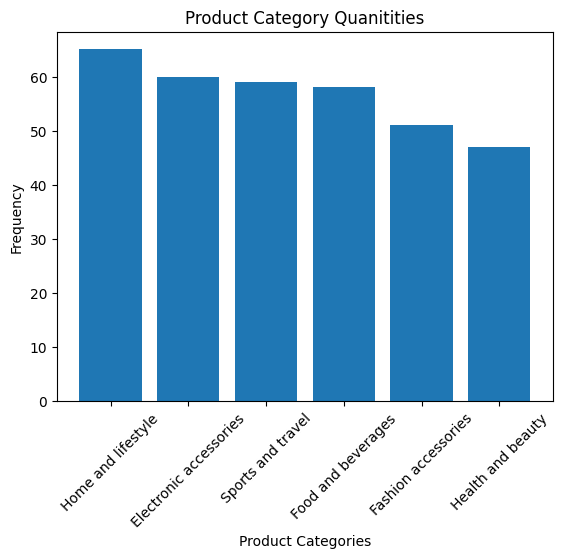

In [30]:
freqTable = supermarket_A_df['Product line'].value_counts()

plt.bar(freqTable.index.tolist(),freqTable.values.tolist())
plt.xticks(rotation=45)
plt.xlabel("Product Categories")
plt.ylabel("Frequency")
plt.title('Product Category Quanitities')
plt.show()


In [31]:
#Method for transition probability calculation
def calculate_probability_series(series, first_variable, second_variable):
    series_values = series.values
    total_count = 0
    target_count = 0

    for i in range(len(series_values) - 1):
        if series_values[i] == first_variable:
            total_count += 1
            if series_values[i + 1] == second_variable:
                target_count += 1

    if total_count == 0:
        return 0
    else:
        return target_count / total_count


In [32]:
#Model Construction
categoryList = ["Fashion accessories", "Food and beverages", "Home and lifestyle", "Sports and travel", "Electronic accessories", "Health and beauty"]
mtrx = np.zeros((6, 6))  # Initialize a 6x6 matrix with zeros


for i, row_category in enumerate(categoryList):
    for j, col_category in enumerate(categoryList):
        mtrx[i][j] = calculate_probability_series(supermarket_A_df_CategoryOnly, row_category, col_category)


In [24]:
categoryList = ["Fashion accessories", "Food and beverages", "Home and lifestyle", "Sports and travel", "Electronic accessories", "Health and beauty"]
def nextPurchase(vector,n):
  maxProbability = max(vector)
  indicies = np.where(vector == maxProbability)[0]
  print("After "+str(n)+" purchase(s), it is most likely that a product under the"+stringCategories(indicies)+ " product line(s) will be chosen \n with probability "+str(maxProbability))


def stringCategories(indicies):
  r = ""
  for i in range(indicies.size):
    r+=", "
    r+= categoryList[indicies[i]]
  return r


In [33]:
#Method for multiplying matricies
def matrix_vector_multiplication(matrix, vector, n):
    result = vector
    for _ in range(n):
        result = np.dot(matrix, result)
    return result

# Example usage
matrix = mtrx #matrix with all transitions
vector = np.array([0, 0, 1, 0, 0, 0]) #starting Position
n =2 #no. of steps

result = matrix_vector_multiplication(matrix, vector, n)
print(result)

startingCategory = categoryList[np.where(vector == 1)[0][0]]
print("Starting with a purchase under "+startingCategory+",")
nextPurchase(result,n)

[0.18954972 0.19514064 0.18957276 0.19220024 0.18740646 0.19580013]
Starting with a purchase under Home and lifestyle,
After 2 purchase(s), it is most likely that a product under the, Health and beauty product line(s) will be chosen 
 with probability 0.19580013328099566
